# Proyek Machine Learning Terapan Terakhir - Lalu Habib Satya Wiguna

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')
%matplotlib inline

## Domain Knowledge
Langkah pertama yang kita lakukan adalah melihat isi dataset yang akan digunakan serta memahami setiap atribut yang ada pada dataset tersebut. Dataset yang digunakan yaitu [Goodreads-books](https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks) yang didapaatkan dari situs [kaggle](https://www.kaggle.com)

In [2]:
books = pd.read_csv('dataset/books.csv', error_bad_lines=False, warn_bad_lines=False)
books

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


Dari output di atas kita mempunyai 11123 data dengan 12 kolom pada Goodreads-books dataset. Berdasarkan informasi dari Kaggle, variabel-variabel pada Goodreads-books dataset adalah sebagai berikut:  
- bookID : kode unik dari setiap buku.
- title : nama atau judul dari buku.
- authors : nama dari penulis buku.
- average_rating : rata-rata penilaian dari setiap buku.
- isbn : kode unik buku yang merujuk pada ISBN (International Standard Book Number).
- isbn13 : 13-digit ISBN untuk mengidentifikasi buku.
- language_code : kode bahasa dari buku, misalnya 'eng' untuk English.
- num_pages : jumlah halaman dari buku.
- ratings_count : total penilaian yang didapatkan dari suatu buku.
- text_reviews_count : total teks review yang diperoleh oleh suatu buku.
- publication_date : tanggal buku dirilis ke publik.
- publisher : nama penerbit yang menerbitkan buku.

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Dari output di atas dapat dilihat bahwa:

- Terdapat 6 kolom dengan tipe object, yaitu: title, authors, isbn, language_code, publication_date, publisher.
- Terdapat 5 kolom numerik dengan tipe int64, yaitu: bookID, isbn13, num_pages, ratings_count, text_review_count.
- Terdapat 1 kolom numerik dengan tipe float64, yaitu: average_rating.

In [4]:
list(books)

['bookID',
 'title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language_code',
 '  num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher']

Dapat dilihat pada output di atas bahwa ada variabel yang penulisannya memiliki spasi di awal yaitu num_pages. Oleh karena itu kita perlu memperbaikinya agar lebih mudah untuk diakses nanti.

In [5]:
# menghapus spasi pada variabel num_pages agar memudahkan pengaksesan variabel nanti

books.columns = books.columns.str.strip()
list(books)

['bookID',
 'title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language_code',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher']

In [6]:
books.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval - dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

## Data Cleaning
Pada tahap ini, kita akan melakukan pembersihan pada data yaitu dengan menghapus data duplikat (jika ada), melihat data yang bernilai kosong, serta memperbaiki isi pada beberapa kolom agar lebih mudah membaca datanya.

### Checking Null Value
Pada tahap ini kita perlu memastikan apakah ada data dengan nilai kosong pada dataset kita karena akan memiliki pengaruh pada proses pembuatan model rekomendasi nanti jika data kita memiliki informasi yang kurang.

In [7]:
# melihat apakah ada data yang memiliki nilai kosong

books.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

Dari output di atas kita dapat melihat bahwa seluruh kolom pada dataset kita tidak memiliki nilai kosong atau null value.

### Checking Duplicated Data
Pada tahap ini kita akan memeriksa apakah ada data duplikat pada dataset yang kita gunakan. Jika ada maka kita perlu untuk menghapusnya agar tidak boros informasi serta mengurangi kemungkinan overfitting.

In [8]:
books.duplicated().sum()

0

Tidak ada data duplikat di dalam dataset.

### Fixing the Data
Pada tahap ini kita perlu mengubah isi pada kolom language_code agar memudahkan kita untuk mengetahui bahasa yang digunakan pada suatu buku. Kemudian kita akan menambahkan satu kolom baru di dataset kita yaitu publication_year yang berisi tentang informasi terkait tahun terbit dari suatu buku.

In [9]:
books.language_code.unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

Dari output di atas dapat dilihat bahwa akan sulit untuk mengetahui bahasa dari suatu buku apabila bentuk datanya seperti di atas. Oleh karena itu kita akan mengubahnya agar menjadi lebih mudah dibaca.

In [10]:
books.language_code.replace(
    to_replace=[
        "eng",
        "en-US",
        "fre",
        "spa",
        "en-GB",
        "mul",
        "grc",
        "enm",
        "en-CA",
        "ger",
        "jpn",
        "ara",
        "nl",
        "zho",
        "lat",
        "por",
        "srp",
        "ita",
        "rus",
        "msa",
        "glg",
        "wel",
        "swe",
        "nor",
        "tur",
        "gla",
        "ale",
    ],
    value=[
        "English",
        "US-English",
        "French",
        "Spanish",
        "British-English",
        "Multiple language",
        "Greek",
        "Middle English",
        "Canada-English",
        "German",
        "Japanese",
        "Arabic",
        "Dutch",
        "Chinese",
        "Latvian",
        "Portuguese",
        "Serbian",
        "Initial Teaching language",
        "Russian",
        "Modern Standard Arabic",
        "Galician",
        "Welsh",
        "Swedish",
        "Murik",
        "Turkish",
        "Gaelic",
        "Afro-Asiatic",
    ],
    inplace=True,
)
books.language_code.unique()

array(['English', 'US-English', 'French', 'Spanish', 'British-English',
       'Multiple language', 'Greek', 'Middle English', 'Canada-English',
       'German', 'Japanese', 'Arabic', 'Dutch', 'Chinese', 'Latvian',
       'Portuguese', 'Serbian', 'Initial Teaching language', 'Russian',
       'Modern Standard Arabic', 'Galician', 'Welsh', 'Swedish', 'Murik',
       'Turkish', 'Gaelic', 'Afro-Asiatic'], dtype=object)

Data pada kolom language_code sekarang menjadi lebih mudah dibaca. Selanjutnya kita akan mengubah nama kolom language_code menjadi language saja karena sudah bukan berbentuk kode lagi.

In [12]:
books = books.rename(columns={'language_code':'language'})

Selanjutnya kita akan menambahkan kolom dengan nama publication_year yang berisi tentang informasi terkait tahun terbit dari suatu buku.

In [14]:
books['publication_year'] = books['publication_date'].apply(lambda x: (int)(str(x[-4:])))

In [15]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,English,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,English,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,English,352,6333,244,11/1/2003,Scholastic,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,English,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,English,2690,41428,164,9/13/2004,Scholastic,2004


Dapat dilihat dari output di atas, dataset sekarang menjadi lebih enak untuk dilihat dan lebih mudah dibaca.

## Exploratory Data Analysis
Pada tahap ini, kita akan melakukan ekplorasi terhadap variabel-variabel yang ada pada dataset yang kita gunakan. Pemahaman terhadap variabel ini penting karena akan membantu kita dalam menentukan pendekatan atau algoritma yang cocok untuk data kita.

In [16]:
list(books)

['bookID',
 'title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher',
 'publication_year']

Total of Authors:  4484
Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Piers Anthony       30
Sandra Brown        29
Mercedes Lackey     29
Dick Francis        28
Terry Pratchett     23
Name: authors, dtype: int64


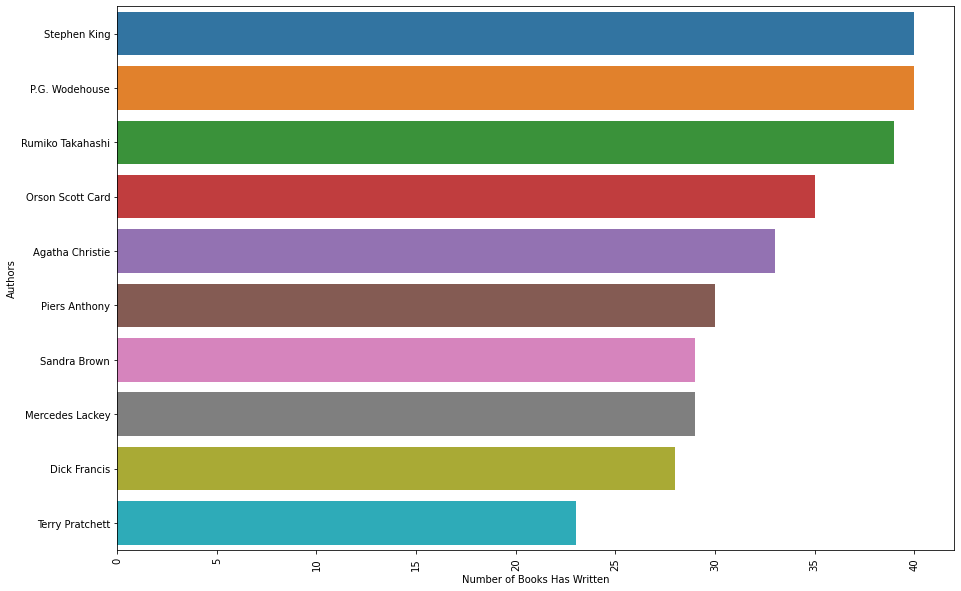

In [27]:
num_of_author = books['authors'].duplicated().sum()
author = books.authors.value_counts()[0:10]
print('Total of Authors: ', num_of_author)
print(author)

plt.figure(figsize=(15, 10))
sns.barplot(x=author, y=author.index)
plt.xticks(rotation=90)
plt.ylabel('Authors')
plt.xlabel('Number of Books Has Written')
plt.show()

Berdasarkan output di atas, dari total 4484 penulis dapat kita lihat Top-10 penulis dengan buku terbanyak yang telah ditulis. Author dengan buku terbanyak yang ditulis adalah Stephen King sebanyak 40 buku. 

Total of Publishers:  8833
Vintage             318
Penguin Books       261
Penguin Classics    184
Mariner Books       150
Ballantine Books    144
Harper Perennial    112
HarperCollins       112
Pocket Books        111
Bantam              110
VIZ Media LLC        88
Name: publisher, dtype: int64


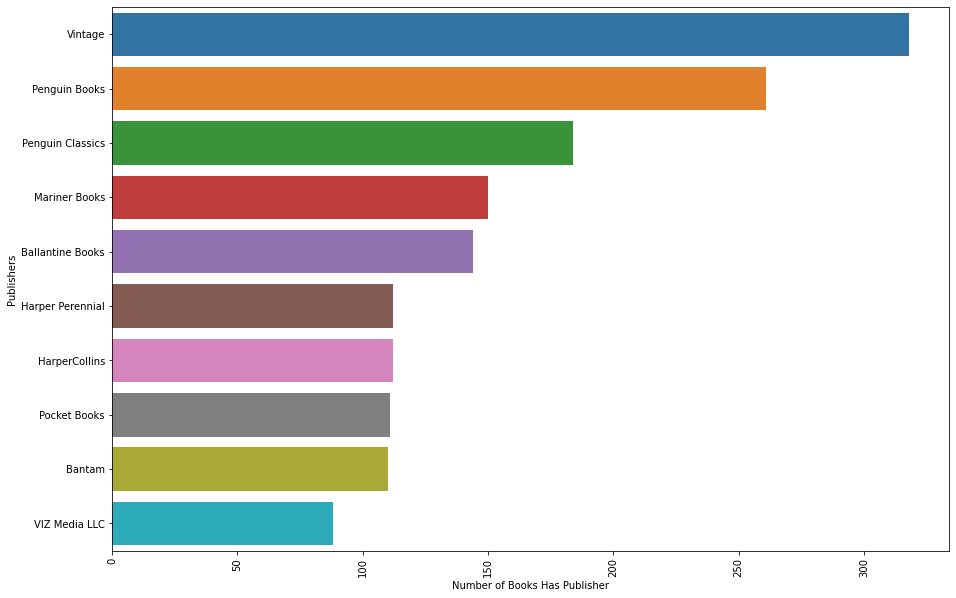

In [30]:
num_of_pub = books['publisher'].duplicated().sum()
publisher = books.publisher.value_counts()[0:10]
print('Total of Publishers: ', num_of_pub)
print(publisher)

plt.figure(figsize=(15,10))
sns.barplot(x=publisher,y=publisher.index)
plt.xticks(rotation=90)
plt.ylabel('Publishers')
plt.xlabel('Number of Books Has Publisher')
plt.show()

Dari output di atas kita dapat melihat Top-10 penerbit dengan buku yang telah diterbitkan dari total 8833 penerbit. Vintage merupakan penerbit yang menerbitkan buku terbanyak dengan total 318 buku yang telah diterbitkan di bawah nama Vintage.

Total of Languages:  27
English              8908
US-English           1408
Spanish               218
British-English       214
French                144
German                 99
Japanese               46
Multiple language      19
Chinese                14
Greek                  11
Name: language, dtype: int64


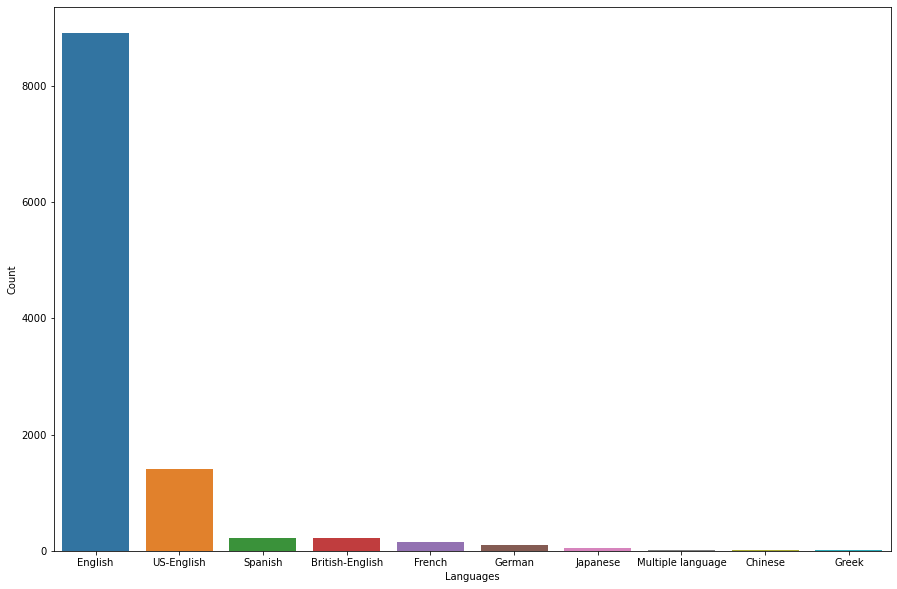

In [43]:
num_of_lang = books['language'].nunique()
languages = books.language.value_counts()[0:10]
print('Total of Languages: ', num_of_lang)
print(languages)

plt.figure(figsize=(15, 10))
sns.barplot(x=languages.index, y=languages)
plt.ylabel('Count')
plt.xlabel('Languages')
plt.show()

Dari total 27 bahasa, Inggris merupakan bahasa yang paling banyak digunakan pada buku yang ada di dataset dengan total 8908 buku yang ditulis dalam bahasa Inggris.

2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
Name: publication_year, dtype: int64


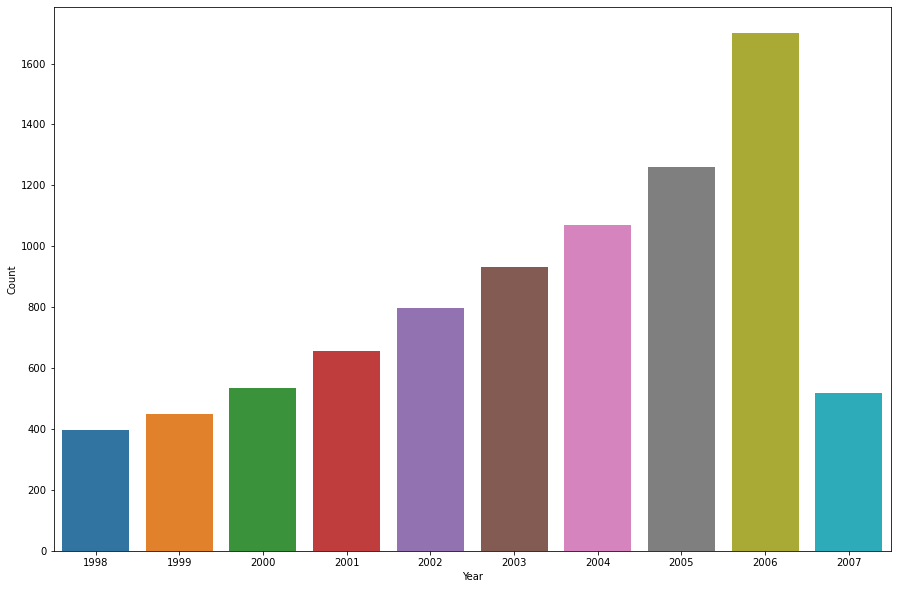

In [42]:
year = books['publication_year'].value_counts()[0:10]
print(year)

plt.figure(figsize=(15,10))
sns.barplot(x=year.index, y=year)
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

Berdasarkan grafik di atas, tahun 2006 merupakan tahun di mana buku paling banyak diterbitkan dengan total 1700 buku yang diterbitkan pada tahun tersebut.

Average Rating of All Books :  3.93


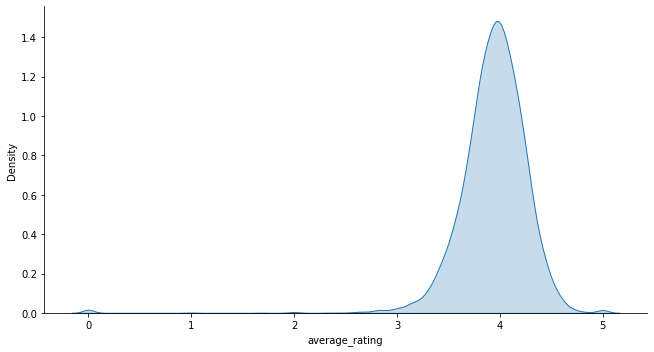

In [63]:
average_rating = round(books['average_rating'].mean(), 2)
print('Average Rating of All Books : ', average_rating)

graph = sns.displot(books, x='average_rating', kind='kde', fill=True);
graph.fig.set_figwidth(10)

Berdasarkan grafik di atas, rata-rata penilaian atau rating yang diberikan untuk semua buku adalah 3.93.

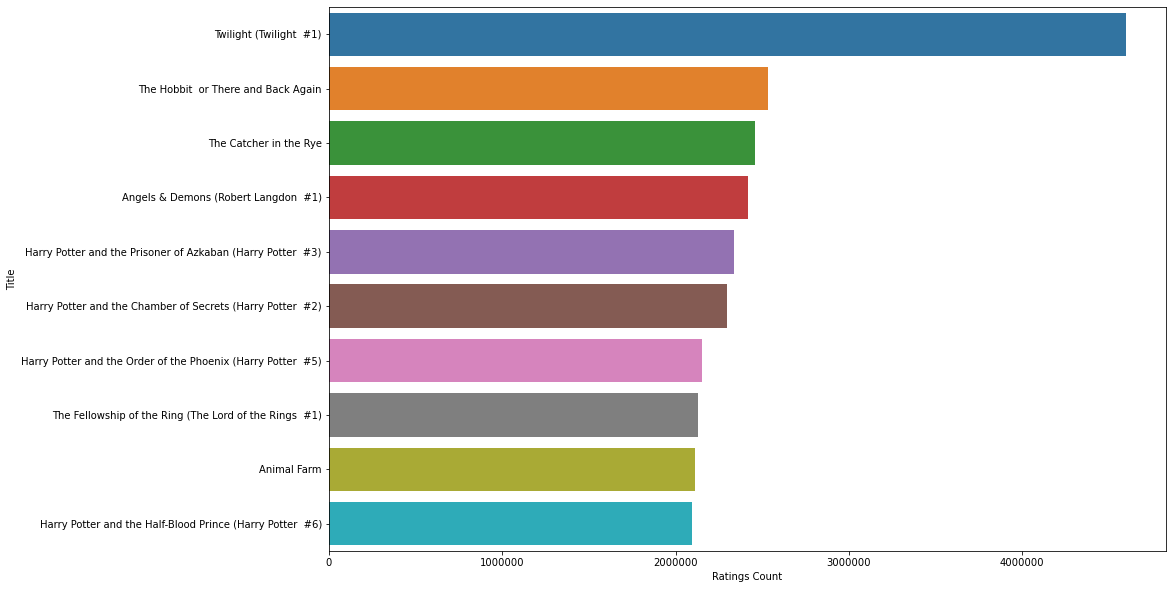

In [85]:
top_10_rating = books[books['ratings_count']>1000000].sort_values(by='ratings_count', ascending=False)[0:10]

plt.figure(figsize=(15,10))
sns.barplot(x=top_10_rating.ratings_count, y=top_10_rating['title'])
plt.ylabel('Title')
plt.xlabel('Ratings Count')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Berdasarkan grafik di atas, buku dengan judul Twilight menempati posisi teratas untuk buku dengan rating terbanyak yang diberikan.

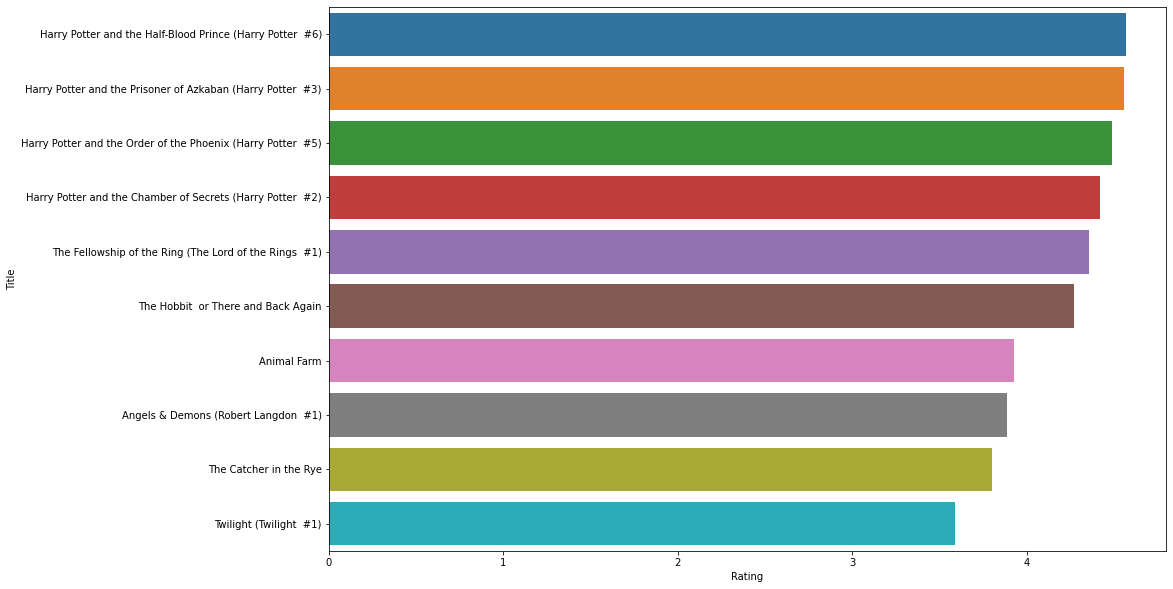

In [88]:
top_10_books = top_10_rating.sort_values(by='average_rating', ascending=False)[0:10]

plt.figure(figsize=(15,10))
sns.barplot(x=top_10_books.average_rating, y=top_10_books['title'])
plt.ylabel('Title')
plt.xlabel('Rating')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Berdasarkan grafik di atas, buku dengan judul Harry Potter and the Half-Blood Prince menempati posisi teratas untuk buku dengan rating tertinggi.

<AxesSubplot:>

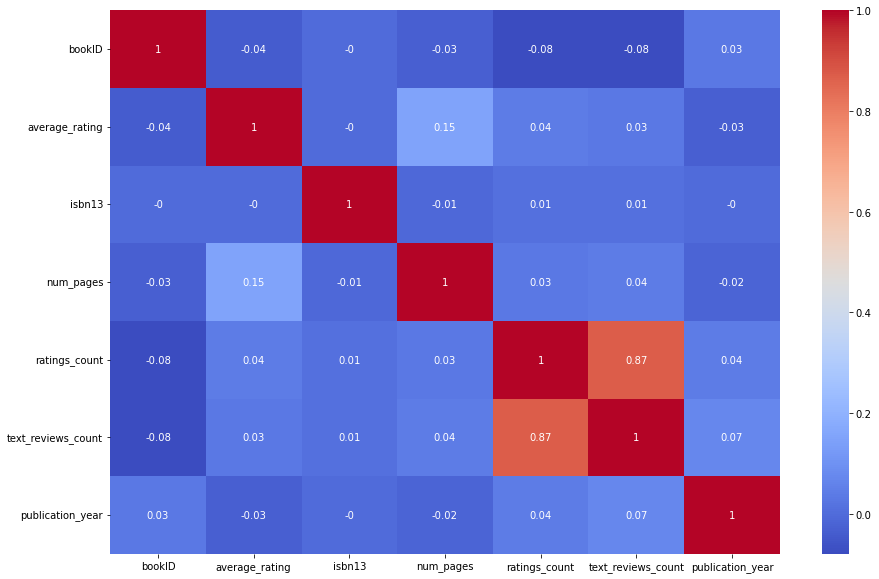

In [89]:
plt.figure(figsize=(15, 10))
correlation_matrix = books.corr().round(2)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

Dari hasil metrik korelasi di atas, kita dapat melihat bahwa variabel text_review_count dengan ratings_count memiliki korelasi yang sangat baik. Perlu diketahui bahwa semakin mendekati angka 1 maka korelasi akan semakin bagus. Oleh karena itu kita perlu melihat hubungan antara average_rating dengan variabel lainnya karena di sini rating memiliki pengaruh yang besar untuk merekomendasikan suatu buku kepada pengguna.

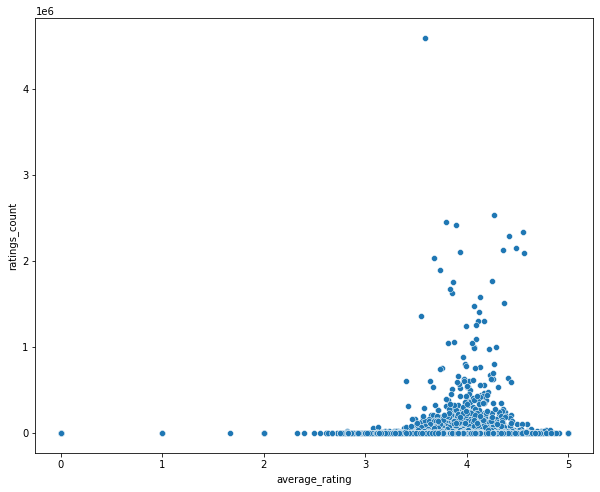

In [96]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=books, x='average_rating', y='ratings_count')
plt.show()

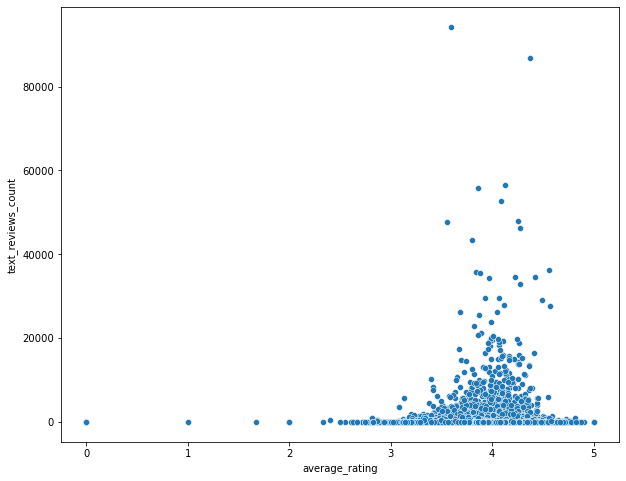

In [101]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=books, x='average_rating', y='text_reviews_count')
plt.show()

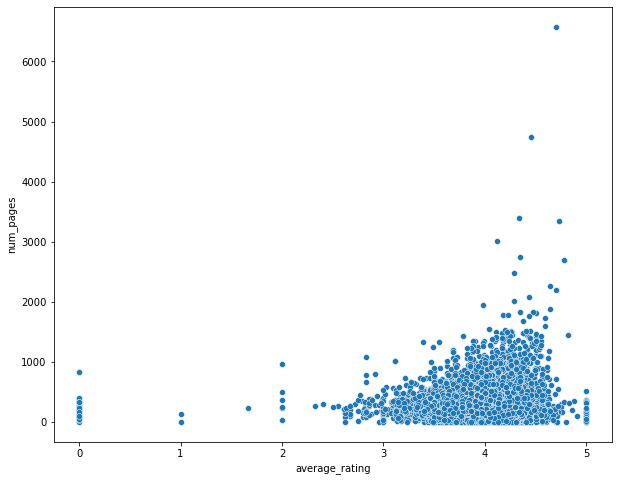

In [97]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=books, x='average_rating', y='num_pages')
plt.show()

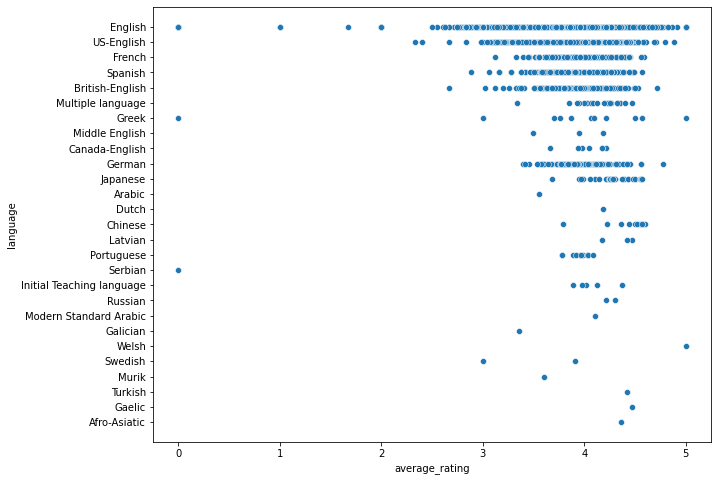

In [99]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=books, x='average_rating', y='language')
plt.show()

Dari hasil scatterplot di atas, dapat diambil kesimpulan sebagai berikut:
- Tidak ada korelasi khusus antara variabel average_rating dengan variabel ratings_count, text_reviews_count, dan num_pages.
- Variabel average_rating dengan variabel language memiliki distribusi penyebaran yang baik sehingga kita akan menggunakan kedua variabel tersebut untuk merekomendasikan buku nanti.

## Data Preparation
Pada bagian ini, kita akan melakukan persiapan padaa dataset kita agar lebih mudah pada tahap pemodelan nanti.

In [103]:
books.loc[(books['average_rating'] >= 0) & (books['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
books.loc[(books['average_rating'] > 1) & (books['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
books.loc[(books['average_rating'] > 2) & (books['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
books.loc[(books['average_rating'] > 3) & (books['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
books.loc[(books['average_rating'] > 4) & (books['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

Selanjutnya kita menambahkan kolom dengan nama rating_between yang berisikan rating antara 0 sampai 1, 1 sampai 2, 2 sampai 3,3 sampai 4, dan 4 sampai 5. Hal tersebut dilakukan agar sistem kita bekerja dengan maksimal untuk menghasilkan rekomendasi yang baik.

In [104]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,English,652,2095690,27591,9/16/2006,Scholastic Inc.,2006,between 4 and 5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,English,870,2153167,29221,9/1/2004,Scholastic Inc.,2004,between 4 and 5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,English,352,6333,244,11/1/2003,Scholastic,2003,between 4 and 5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,English,435,2339585,36325,5/1/2004,Scholastic Inc.,2004,between 4 and 5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,English,2690,41428,164,9/13/2004,Scholastic,2004,between 4 and 5


In [105]:
books_rating = pd.get_dummies(books['rating_between'])
books_language = pd.get_dummies(books['language'])

Kita memisahkan variabel rating_between dan language dengan membuat dataframe baru untuk masing-masing variabel.

In [106]:
books_rating.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [107]:
books_language.head()

,Afro-Asiatic,Arabic,British-English,Canada-English,Chinese,Dutch,English,French,Gaelic,Galician,...,Multiple language,Murik,Portuguese,Russian,Serbian,Spanish,Swedish,Turkish,US-English,Welsh
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
features = pd.concat([books_rating, books_language, books['average_rating'], books['ratings_count']], axis=1)
features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,Afro-Asiatic,Arabic,British-English,Canada-English,Chinese,...,Portuguese,Russian,Serbian,Spanish,Swedish,Turkish,US-English,Welsh,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428


Kemudian kita akan membuat dataframe baru dengan menggabungkan beberapa data seperti books_rating, books_language, average_rating, dan ratings_count sehingga pada tahap pemodelan dataset kita sudah siap digunakan dan dimasukkan ke sistem rekomendasi.

## Model Development Using Collaborative Filtering
Untuk proyek kali ini, akan digunakan collaboreative filtering pada sistem rekomendasinya. Collaborative filtering akan memberikan rekomendasi buku berdasarkan rating yang telah diberikan sebelumnya untuk suatu buku. Dari data rating buku, kita akan mengidentifikasi buku-buku yang mirip dengan menggunakan algoritma K-Nearest Neighbor (KNN) untuk direkomendasikan ke pengguna. KNN adalah algoritma yang relatif sederhana dibandingkan dengan algoritma lain. Algoritma KNN menggunakan 'kesamaan fitur' untuk memprediksi nilai dari setiap data yang baru. Dengan kata lain, setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan.KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat (dengan k adalah sebuah angka positif). Nah, itulah mengapa algoritma ini dinamakan K-nearest neighbor (sejumlah k tetangga terdekat). KNN bisa digunakan untuk kasus klasifikasi dan regresi. Pada kali ini, kita akan menggunakannya untuk membuat sebuah sistem rekomendasi.

In [110]:
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

Pertama-tama kita perlu melakukan penskalaan pada dataset kita untuk mengurangi bias karena beberapa buku memiliki banyak fitur. Secara garis besar kita mencari nilai tengah dari fitur-fitur tersebut untuk kemudian disamaratakan.

In [113]:
features

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.14000000e-01, 4.55816060e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.98000000e-01, 4.68317403e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 1.37743803e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92000000e-01, 1.78351363e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44000000e-01, 1.67258779e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82000000e-01, 2.45776879e-05]])

In [126]:
model = neighbors.NearestNeighbors(n_neighbors=11)
model.fit(features)
books_dist, books_idlist = model.kneighbors(features)

Selanjutnya kita akan memasukkan data ke dalam model KNN dengan parameter n_neighbors=11 yang berarti kita akan mengambil 10 buku teratas yang memiliki kemiripan untuk direkomendasikan kepada pengguna.

In [127]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = books[books['title'] == book_name].index
    book_id = book_id[0]
    for newid in books_idlist[book_id]:
        if newid == book_id:
            pass
        else:
            book_list_name.append(books.loc[newid].title)
    return book_list_name

Selanjutnya kita membuat sebuah function yang berfungsi untuk melakukan filtering terhadap buku yang akan direkomendasikan dengan parameter function yaitu judul buku. Dari judul buku tersebut kemudian akan dicari buku lain yang memiliki kemiripan dengan menggunakan model KNN yang telah dibuat sebelumnya. Function ini akan me-return list dengan isi judul-judul buku yang memiliki fitur mirip dengan judul buku yang dimasukkan.

In [130]:
books_recommendation = BookRecommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
books_recommendation

['Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)',
 'The Hobbit  or There and Back Again',
 'The Book Thief',
 'The Giver (The Giver  #1)',
 'Little Women',
 'Jane Eyre']

Berdasarkan output di atas, sistem kita telah berhasil merekomendasikan buku yang memiliki kemiripan dengan judul buku yang kita masukkan sebagai parameter pada function BookRecommender.

## Model Evaluation